# Analysis 1

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
cityTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv')
countryTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [3]:
cityTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,NS,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,N,1743
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,N,1743
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,N,1744
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,N,1744
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,N,1744


In [24]:
countryTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [56]:
countryTemp['dt'] = pd.to_datetime(countryTemp['dt'])
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x.strftime('%Y'))
countryTemp = countryTemp.dropna()

In [57]:
countryTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [59]:
yearTemp = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
yearTemp['Uncertainty'] = yearTemp['AverageTemperatureUncertainty']/yearTemp['AverageTemperature']
yearTemp.head(20)

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,Uncertainty
0,Afghanistan,1838,18.379571,2.756000,0.149949
1,Afghanistan,1840,13.413455,2.502000,0.186529
2,Afghanistan,1841,13.997600,2.452100,0.175180
3,Afghanistan,1842,15.154667,2.381222,0.157128
4,Afghanistan,1843,13.756250,2.353083,0.171056
5,Afghanistan,1844,13.148750,2.235417,0.170010
6,Afghanistan,1845,13.305833,2.370917,0.178186
7,Afghanistan,1846,14.030833,2.442250,0.174063
8,Afghanistan,1847,13.475583,2.457833,0.182392
9,Afghanistan,1848,13.136250,2.029583,0.154502


In [108]:
test = yearTemp.groupby('Year').mean().reset_index(drop=False)
test = test[test['Uncertainty'] <= .2]
test.head(10)

,Year,AverageTemperature,AverageTemperatureUncertainty,Uncertainty
0,1881,17.914589,0.974823,0.062910
1,1882,17.819800,0.878494,0.132360
2,1883,18.011056,0.924425,0.058477
3,1884,17.870114,0.967953,0.068201
4,1885,17.940837,0.925745,0.064454
5,1886,17.939846,0.933012,0.046733
6,1887,17.817754,0.899737,0.033164
7,1888,17.725895,0.906426,0.054554
8,1889,18.175630,0.889237,0.057622
9,1890,18.072447,0.944061,0.059728


In [83]:
yearTemp['Year'].describe()

count     45915
unique      267
top        1999
freq        242
Name: Year, dtype: object

In [111]:
yearTemp['Year'] = yearTemp['Year'].apply(lambda x : int(x))

In [105]:
yearTemp = yearTemp[yearTemp['Year'] > 1880]
countries = yearTemp['Country'].unique()
listHolder = []
for each in countries:
    holder = yearTemp[yearTemp['Country'] == each]
    holder.sort_values('Year')
    oldTemp = holder['AverageTemperature'].head(5).mean()
    newTemp = holder['AverageTemperature'].tail(5).mean()
    diffTemp = newTemp - oldTemp
    listHolder.append((each,oldTemp,newTemp,diffTemp))
    
diffs = DataFrame(listHolder, columns=('Country',
                                       'OldTemp', 
                                       'NewTemp',
                                       'DiffTemp')).sort_values(by='DiffTemp', ascending=False).reset_index(drop=True)

diffs.head()

,Country,OldTemp,NewTemp,DiffTemp
0,Canada,-5.995517,-2.879517,3.116000
1,Greenland,-19.553150,-16.443817,3.109333
2,Denmark,-19.005567,-15.939700,3.065867
3,Svalbard And Jan Mayen,-7.965283,-5.203417,2.761867
4,Saint Pierre And Miquelon,3.553067,6.250939,2.697872


In [69]:
diffs.tail()

,Country,OldTemp,NewTemp,DiffTemp
237,Cuba,25.470650,26.022422,0.551772
238,Cayman Islands,26.784183,27.329761,0.545578
239,Jamaica,26.285686,26.806483,0.520797
240,South Georgia And The South Sandwich Isla,1.977300,2.296458,0.319158
241,Armenia,10.904648,10.436417,-0.468232


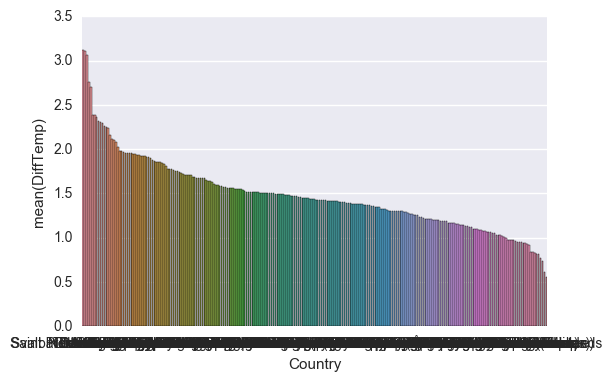

In [113]:
sns.barplot(diffs['Country'],diffs['DiffTemp'])

In [114]:
print(len(diffs[diffs['DiffTemp'] > 2]))

19


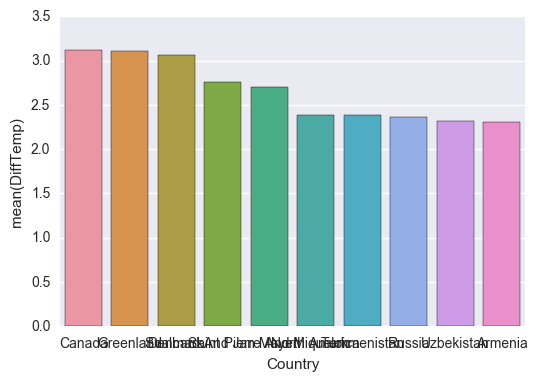

In [112]:
sns.color_palette("RdBu_r", 7)
sns.barplot(diffs['Country'][0:10],diffs['DiffTemp'][0:10])


In [51]:
test = mins[mins['Uncertainty'] < 0.1]
print(countryTemp['Country'].nunique())
print(test['Country'].nunique())
print(test['Country'].value_counts())

243
239
Svalbard And Jan Mayen               252
Canada                               215
Bangladesh                           210
Sri Lanka                            208
India                                207
Russia                               202
Bahamas                              201
Algeria                              200
Western Sahara                       192
Turks And Caicas Islands             191
Denmark                              191
Cayman Islands                       191
Greenland                            191
Cuba                                 190
Thailand                             190
Jamaica                              189
Haiti                                189
Dominican Republic                   188
Burma                                188
Laos                                 188
Honduras                             187
Guatemala                            187
Belize                               187
Libya                                184
Nicaragu

In [43]:
print(len(test))

36210


In [33]:
countryTemp[countryTemp['Country']=='Afghanistan']['AverageTemperatureUncertainty'].min()

0.128

In [9]:
countryTemp.groupby('Country').mean().reset_index(drop=False).head()

,Country,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,14.045007,0.930162
1,Africa,24.074203,0.395564
2,Albania,12.610646,1.524574
3,Algeria,22.985112,1.176241
4,American Samoa,26.611965,0.541258


find a way to take the first three and last three of each country and find the difference